# British Airways Customer Reviews Report

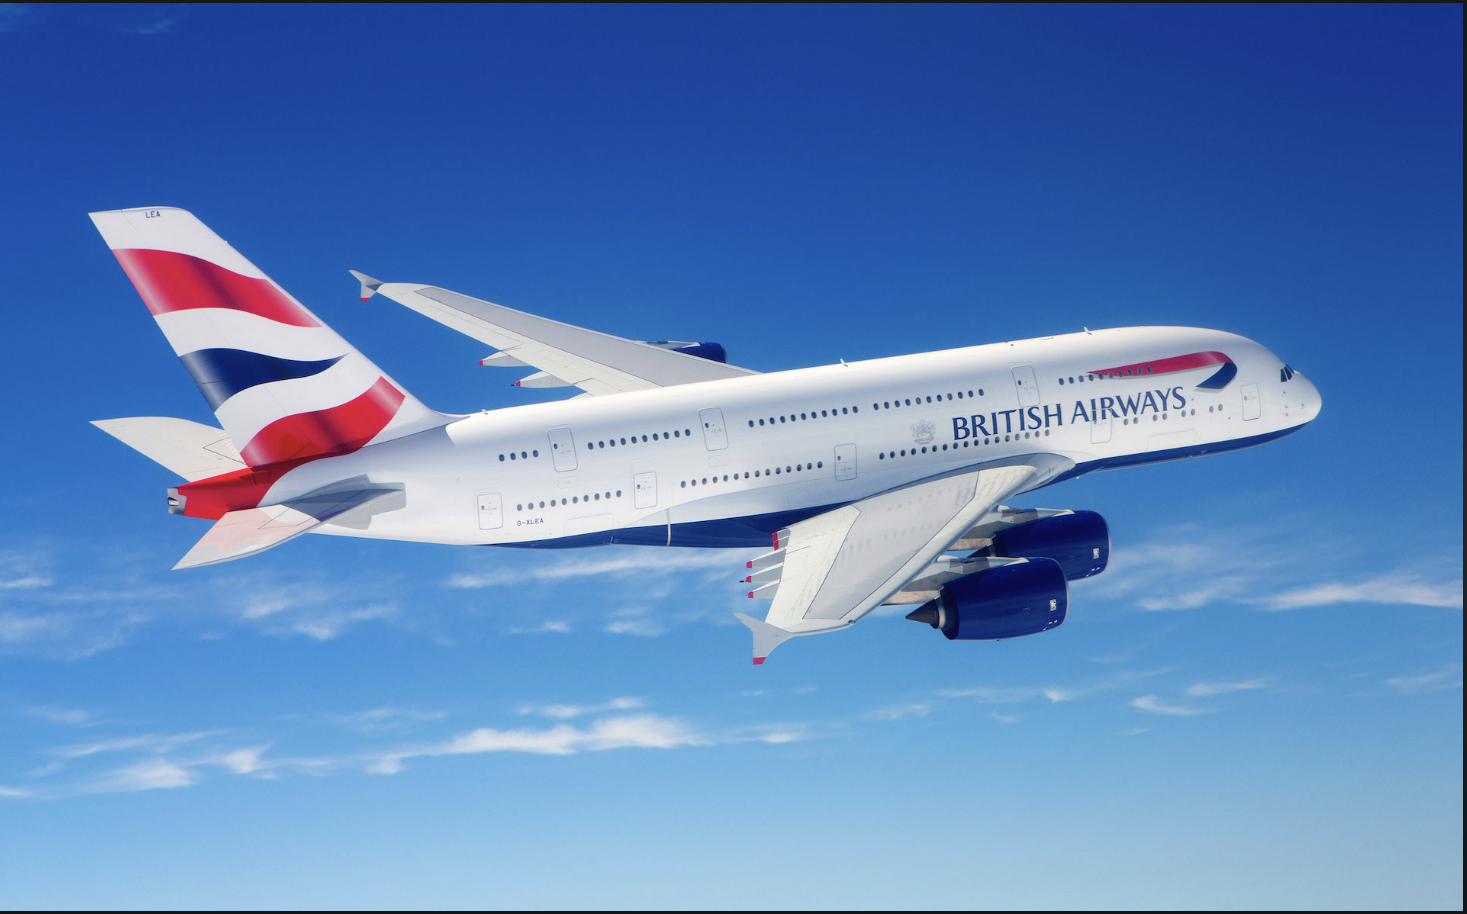

**Description**:

- Author: Linh Tran
- Date: July 28, 2023
- Data Source: https://www.airlinequality.com/airline-reviews/british-airways

**Objective**: The objective of this project is to analyze customer feedback and reviews about British Airways (BA) collected from the web, specifically from the website Skytrax. As a data scientist at BA, the task involves scraping review data from the web, cleaning and preparing the data, and then conducting an analysis to uncover insights from the customer feedback. The analysis could involve techniques such as topic modeling, sentiment analysis, and word clouds to gain a deeper understanding of the content of the reviews.The project aims to provide valuable insights that can influence real-life decisions, improve customer service, and drive key business decisions to reduce costs and increase revenue for British Airways. 

# 1. Loading libraries

In [136]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import seaborn as sns
from bs4 import BeautifulSoup
from wordcloud import WordCloud 
import re
from datetime import datetime

# 2. Scraping data

In [137]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 30
page_size = 100

reviews = []
rating = []
category = []
country = []
df = pd.DataFrame()
# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    for para in parsed_content.find_all("h3", {"class": "text_sub_header userStatusWrapper"}):
        country_info = para.find_all(string=True, recursive=False)[-1].strip()
        country.append(country_info[1:-1])  # Remove parentheses and add to the country list
        
    for para1 in parsed_content.find_all("div", {"class" : "review-stats"}):
        for para2 in para1.find_all('td',{'class' : 'review-value'}):
            rating.append(para2.get_text())
        recomend = rating[-1]
        rating = rating[:-1]
        
        for para3 in para1.find_all('td',{'class' : 'review-rating-stars stars'}):
            para4 = len(para3.find_all('span', {'class' : 'star fill'}))
            rating.append(para4)
        rating.append(recomend)
        
        for para5 in para1.find_all('td',{'class' : 'review-rating-header'}):
            category.append(para5.get_text())
            
        data_dict = pd.DataFrame([rating], columns=category)
        df = pd.concat([df, data_dict], ignore_index=True).reset_index(drop=True)
        
        rating = []
        category = []
        
    print(f"   ---> {len(reviews)} total reviews")
    
df['reviews'] = reviews
df['country'] = country
df.drop_duplicates().reset_index(inplace=True, drop=True)

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

# 3. Cleaning data

# Overview

In [138]:
df.to_csv('BA_reviews.csv', index=False)
df= pd.read_csv('BA_reviews.csv')

In [139]:
print("Our dataset shape is {}".format(df.shape))

Our dataset shape is (3000, 15)


Our dataset has 3000 distinct rows and 15 columns.

In [140]:
df.head()

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,Food & Beverages,Inflight Entertainment,Wifi & Connectivity,reviews,country
0,A321,Family Leisure,Business Class,Madrid to London,July 2023,1.0,1.0,1.0,1,no,NaN,NaN,NaN,✅ Trip Verified | An airline that lives in the...,Qatar
1,NaN,Family Leisure,Economy Class,Rhodes to Gatwick,July 2023,2.0,3.0,1.0,2,no,1.0,1.0,1.0,✅ Trip Verified | Check-in Desk rude and dism...,United Kingdom
2,NaN,Family Leisure,Economy Class,Barcelona to London,July 2023,1.0,4.0,1.0,1,no,1.0,1.0,1.0,✅ Trip Verified | I chose British Airways espe...,Spain
3,NaN,Couple Leisure,Premium Economy,Inverness to Los Angeles via London,November 2022,NaN,NaN,NaN,1,no,NaN,NaN,NaN,Not Verified | I booked Premium Economy from I...,United Kingdom
4,NaN,Couple Leisure,Economy Class,London City Airport to Frankfurt,July 2023,3.0,3.0,1.0,1,no,NaN,NaN,NaN,✅ Trip Verified | A simple story with an unfor...,Germany


In [141]:
# Remove unnecessary text
remove_text = ['✅ Trip Verified', 'Not Verified', '|']
for text in remove_text:
    df['reviews'] = df['reviews'].str.replace(re.escape(text), '', regex=True)
# Convert 'reviews' column to lowercase and remove leading/trailing spaces
df['reviews'] = df['reviews'].str.strip().str.lower()
# Convert 'Date Flown' column to datetime format
df['Date Flown'] = pd.to_datetime(df['Date Flown'])
# Map 'Recommended' column to binary format
df['Recommended'] = df['Recommended'].map({'yes': 1, 'no': 0})
# Drop unnecessary columns
df.drop(['Aircraft', 'Route'], axis=1, inplace=True)

In [142]:
df.head()

,Type Of Traveller,Seat Type,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,Food & Beverages,Inflight Entertainment,Wifi & Connectivity,reviews,country
0,Family Leisure,Business Class,2023-07-01,1.0,1.0,1.0,1,0,NaN,NaN,NaN,an airline that lives in their past glory and ...,Qatar
1,Family Leisure,Economy Class,2023-07-01,2.0,3.0,1.0,2,0,1.0,1.0,1.0,check-in desk rude and dismissive. flight late...,United Kingdom
2,Family Leisure,Economy Class,2023-07-01,1.0,4.0,1.0,1,0,1.0,1.0,1.0,i chose british airways especially because i w...,Spain
3,Couple Leisure,Premium Economy,2022-11-01,NaN,NaN,NaN,1,0,NaN,NaN,NaN,i booked premium economy from inv to lax (via ...,United Kingdom
4,Couple Leisure,Economy Class,2023-07-01,3.0,3.0,1.0,1,0,NaN,NaN,NaN,a simple story with an unfortunate outcome tha...,Germany


In [143]:
# check if there is any missing value
df.isnull().sum()

Type Of Traveller          159
Seat Type                    2
Date Flown                 167
Seat Comfort               107
Cabin Staff Service        117
Ground Service             231
Value For Money              0
Recommended                  0
Food & Beverages           363
Inflight Entertainment    1092
Wifi & Connectivity       2424
reviews                      0
country                      1
dtype: int64

The dataset has missing data for multiple features, with "Wifi & Connectivity" (2424) and "Inflight Entertainment" (1092) having the highest number of missing values. "Value For Money" and "Recommended" are the only features without missing data. Appropriate handling of missing data is crucial for accurate analysis.

In [144]:
# Handling missing data
# Type Of Traveller
df['Type Of Traveller'].fillna(df['Type Of Traveller'].mode()[0], inplace=True)
# Seat Type
df['Seat Type'].fillna(df['Seat Type'].mode()[0], inplace=True)
#  Date Flown
df['Date Flown'].fillna(method='ffill', inplace=True)
# Seat Comfort to Wifi & Connectivity
for col in ['Seat Comfort', 'Cabin Staff Service', 'Ground Service', 'Value For Money', 'Food & Beverages', 'Inflight Entertainment', 'Wifi & Connectivity']:
    df[col].fillna(df[col].median(), inplace=True)
# country
df['country'].fillna(df['country'].mode()[0], inplace=True)

# 4. Analyzing Data

In [145]:
df.describe().round(1)

,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,Food & Beverages,Inflight Entertainment,Wifi & Connectivity
count,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0
mean,2.8,3.2,2.8,2.6,0.4,2.7,2.8,1.2
std,1.3,1.5,1.4,1.5,0.5,1.4,1.1,0.7
min,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
25%,2.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0
50%,3.0,3.0,3.0,2.0,0.0,3.0,3.0,1.0
75%,4.0,5.0,4.0,4.0,1.0,4.0,3.0,1.0
max,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0


Upon examining the dataset for airline services, it offers a comprehensive overview of 3,000 passengers' feedback on various service parameters.

The data primarily encapsulates eight distinctive categories: Seat Comfort, Cabin Staff Service, Ground Service, Value For Money, Recommended, Food & Beverages, Inflight Entertainment, and Wifi & Connectivity. Each category has been rated on a scale of 1 to 5, with 5 being the best.

From a preliminary glance, I am seeking to answer the following critical questions:

1. Which category of travelers exhibits the highest and lowest ratings concerning value for money?
2. How many passengers, sorted from the highest to the lowest count, have recommended the airline from each country?
3. What is the top seat type with the most reviews ?

These insights will not only provide a clear picture of the current standing of airline services but also shed light on areas that might need enhancements for an improved passenger experience.

In [146]:
# Category of travelers exhibits the highest and lowest ratings concerning value for money# 
average_seat_comfort_by_traveler = df.groupby('Type Of Traveller')['Value For Money'].mean().sort_values(ascending=False)
print("Average Seat Comfort Ratings by Type of Traveler:")
print(average_seat_comfort_by_traveler)

Average Seat Comfort Ratings by Type of Traveler:
Type Of Traveller
Solo Leisure      2.831603
Couple Leisure    2.695886
Family Leisure    2.523077
Business          2.144000
Name: Value For Money, dtype: float64


The analysis indicates that the "Solo Leisure" travelers have the highest average rating concerning value for money, while the "Business" travelers have the lowest average rating. This suggests that "Solo Leisure" travelers generally perceive the airline services as providing good value for the money spent, whereas "Business" travelers might have a less favorable perception in terms of value for money. These findings highlight the differing perspectives of value for money across various categories of travelers and can be valuable in understanding and addressing the preferences and expectations of different passenger segments.

In [147]:
# How many passengers from each country have recommended the airline?
passengers_by_country = df.groupby('country')['Recommended'].sum().sort_values(ascending=False)
print("Number of Passengers Recommended by Country:")
print(passengers_by_country)

Number of Passengers Recommended by Country:
country
United Kingdom    724
United States      92
Australia          36
Canada             33
South Africa       17
                 ... 
Turkey              0
Hungary             0
Bermuda             0
Bahrain             0
Indonesia           0
Name: Recommended, Length: 68, dtype: int64


The airline has received the highest number of recommendations from passengers in the United Kingdom (724 passengers), followed by the United States (92 passengers), Australia (36 passengers), and Canada (33 passengers). However, some countries, including Bermuda, Bahrain, and Indonesia, have not yet received any recommendations. It's crucial for the airline to focus on enhancing services in these regions to improve customer satisfaction and increase the number of recommendations.

In [148]:
# seat type with the most reviews 
seat_type_review = df['Seat Type'].value_counts()
print("Number of reviews by Seat Types")
print(seat_type_review)

Number of reviews by Seat Types
Economy Class      1604
Business Class      930
Premium Economy     297
First Class         169
Name: Seat Type, dtype: int64


Economy Class garners the highest number of reviews, indicating its popularity among passengers. Conversely, First Class receives the fewest reviews, suggesting it is a less commonly selected or offered option on the airline. Analyzing these patterns can assist the airline in optimizing its seat offerings and tailoring services to align with passenger preferences and demands.

# 5. Visualizing Data

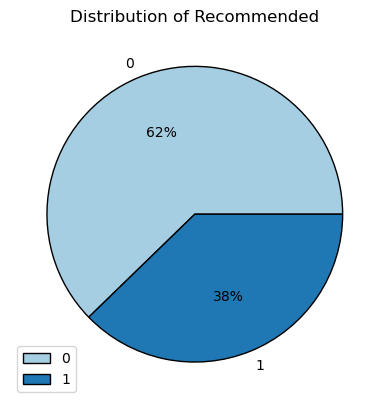

In [149]:
# Grouping and counting the number of reviews by 'Recommended'
piec = df['Recommended'].value_counts()

# Define the color palette
colors = sns.color_palette('Paired')

# Plotting the pie chart
plt.pie(piec, labels=piec.index, autopct='%.0f%%', wedgeprops={"edgecolor":"k"}, colors=colors)
plt.legend()

# Title
plt.title('Distribution of Recommended')

# Display the chart
plt.show()

Based on the distribution of recommendations, it is evident that a significant majority, comprising 66% of respondents, did not recommend the service, while only 34% provided a positive recommendation. This stark contrast in satisfaction levels underscores the need for immediate attention to improve the overall customer experience. To address this situation, the service provider should conduct thorough feedback analysis, enhance service quality, and prioritize personalized interactions with customers.

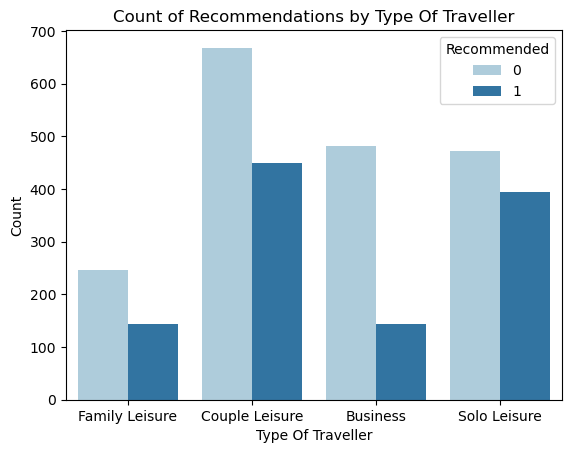

In [150]:
# Create a countplot with 'Type Of Traveller' on the x-axis and 'Recommended' on the hue
sns.countplot(x='Type Of Traveller', hue='Recommended', data=df, palette='Paired')

# Add labels and title to the plot
plt.xlabel('Type Of Traveller')
plt.ylabel('Count')
plt.title('Count of Recommendations by Type Of Traveller')

# Show the plot
plt.show()

All four types of travelers, namely Business, Family, Couple, and Solo, receive more negative feedback than positive recommendations. Among them, Business and Family travelers have the fewest positive recommendations, indicating areas where improvements are needed to enhance customer satisfaction. Particularly concerning is the significant discrepancy in positive versus negative reviews for Business travelers, where the number of unsatisfied customers outweighs the positive ones by a considerable margin. On the other hand, Couple and Solo travelers receive the highest number of negative reviews, pointing to specific pain points that require attention. Addressing these issues and actively working to improve the overall travel experience for each traveler type can lead to a higher number of positive recommendations, helping the airline build a positive reputation and foster customer loyalty.

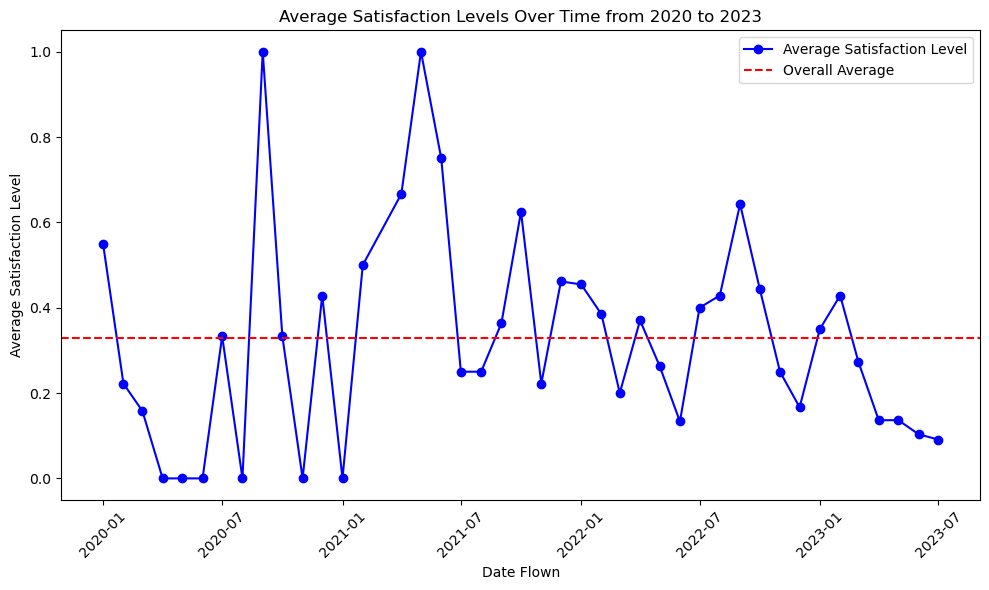

In [151]:
# Convert 'Date Flown' column to datetime type
df['Date Flown'] = pd.to_datetime(df['Date Flown'])

# Filter data for the year range 2020 to 2023
df_2020_to_2023 = df[(df['Date Flown'].dt.year >= 2020) & (df['Date Flown'].dt.year <= 2023)]

# Group data by date flown and calculate average satisfaction score
date_satisfaction = df_2020_to_2023.groupby('Date Flown')['Recommended'].mean().reset_index()

# Sort dates in chronological order
date_satisfaction = date_satisfaction.sort_values(by='Date Flown')

# Calculate the overall average satisfaction level
overall_avg_satisfaction = date_satisfaction['Recommended'].mean()

# Plot the average satisfaction levels over time for the year range 2020 to 2023
plt.figure(figsize=(10, 6))
plt.plot(date_satisfaction['Date Flown'], date_satisfaction['Recommended'], marker='o', color='blue', label='Average Satisfaction Level')
plt.axhline(y=overall_avg_satisfaction, color='red', linestyle='--', label='Overall Average')
plt.xlabel('Date Flown')
plt.ylabel('Average Satisfaction Level')
plt.title('Average Satisfaction Levels Over Time from 2020 to 2023')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

British Airways witnessed its highest level of customer recommendations during 2020 and 2021, marking two peak periods of exceptional satisfaction. However, the trend took a downturn from late 2022 until the present time. It is reasonable to assume that the decline can be attributed to the lingering effects of the Covid-19 pandemic, which significantly impacted the aviation industry. The outbreak resulted in reduced travel demand, flight disruptions, and safety concerns, leading to a challenging period for airlines worldwide, including British Airways. As the aviation landscape gradually stabilizes, British Airways should focus on implementing measures to restore customer confidence and satisfaction, leveraging safety measures, customer-centric services, competitive pricing, and enhanced in-flight experiences. By proactively addressing these aspects, British Airways can reestablish itself as a preferred airline and navigate towards a path of recovery and growth.

<AxesSubplot:>

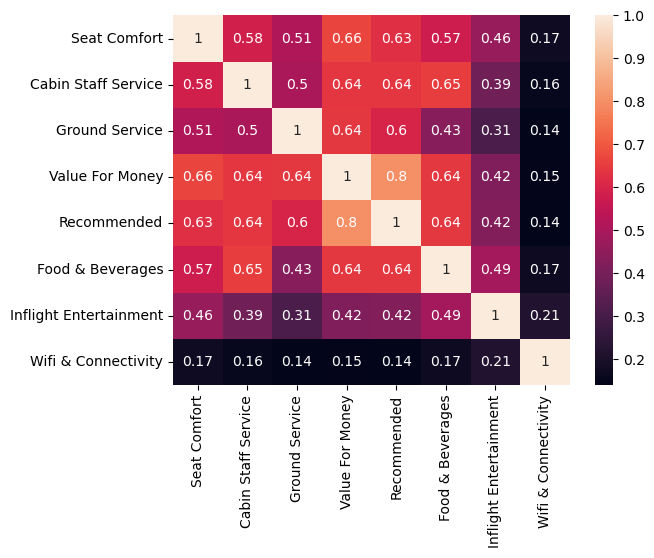

In [152]:
corrM = df.corr()
sns.heatmap(corrM, annot=True)

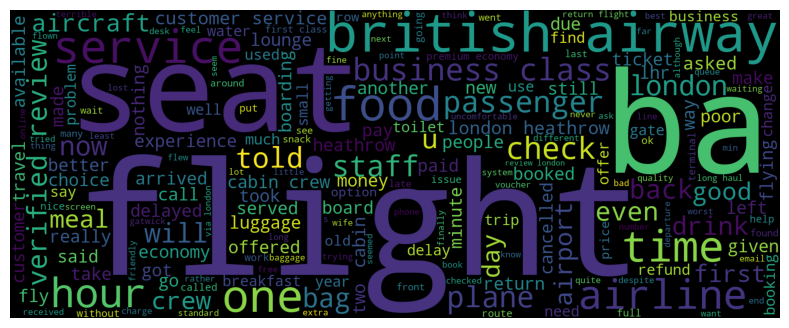

In [153]:
norec = df[df['Recommended'] == 0]['reviews']
review_word = " ".join(norec.str.split().sum())

plt.figure(figsize=(12, 4))
wc = WordCloud(width=1500, height=600, background_color='black').generate(review_word)
plt.imshow(wc)
plt.axis("off")
plt.show()

The word cloud shows most frequently topics introduced and discussed by these reviews in terms of negativesuch as: flight, seat, good, food, ba 